In [1]:
import cv2
import numpy as np
from ac2D import *
import matplotlib.pyplot as plt
from snake import Snake2D, SnakeParams

In [2]:
vase_image_path = "./imgs/vase.png"
vase = cv2.imread(vase_image_path, 0)
print(vase.shape)
print(vase.dtype)

(450, 600)
uint8


In [33]:
vase_V_circle = init_circle(
    (vase.shape[1] // 2, vase.shape[0] // 2), 200, num_points=50
)
vase_V_subdivided = subdivision(vase_V_circle, k=3)
print("Pontos subdivididos:", vase_V_subdivided.shape)
vase_v_init = vase_V_subdivided

Pontos subdivididos: (442, 2)


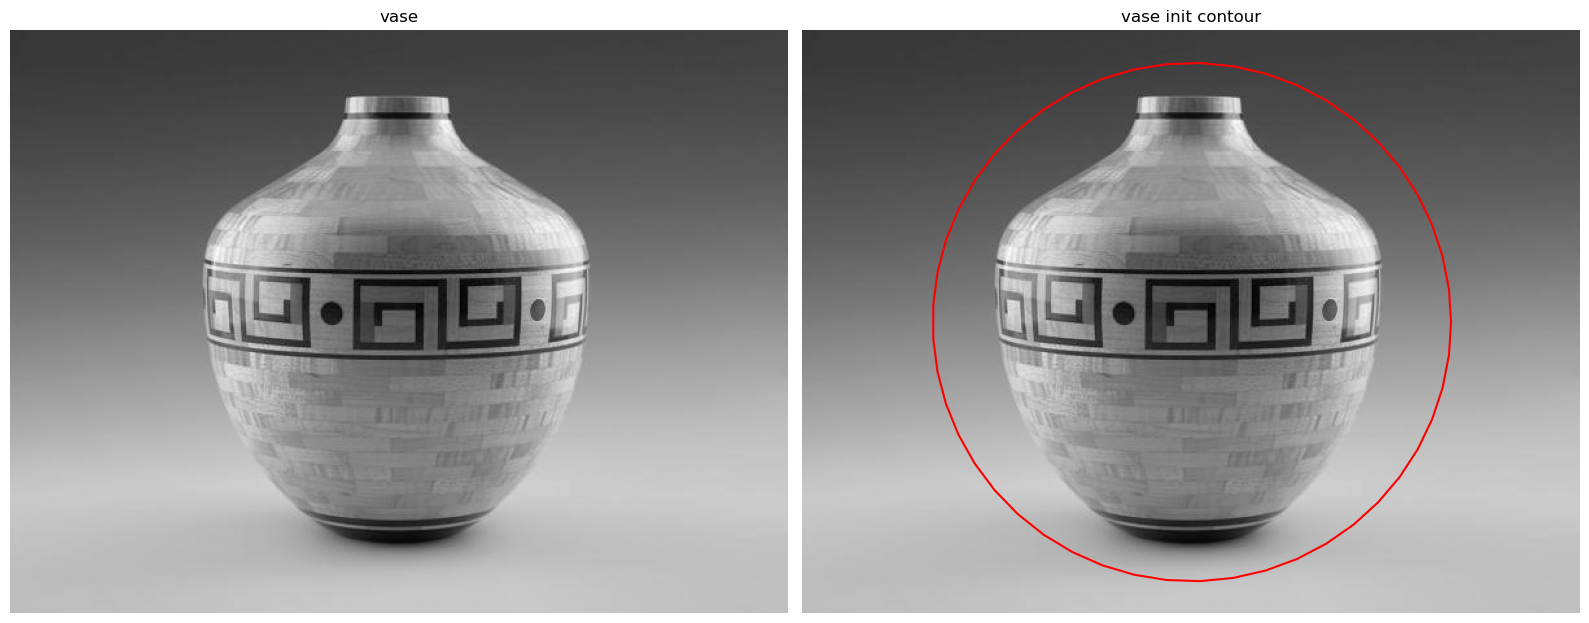

In [34]:
# Display initial contour
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(vase, cmap="gray")
ax1.set_title("vase")
ax1.axis("off")
ax2.imshow(vase, cmap="gray")
ax2.set_title("vase init contour")
ax2.plot(vase_v_init[:, 0], vase_v_init[:, 1], "r-")
ax2.axis("off")
plt.tight_layout()
plt.show()

0.8392617790073621


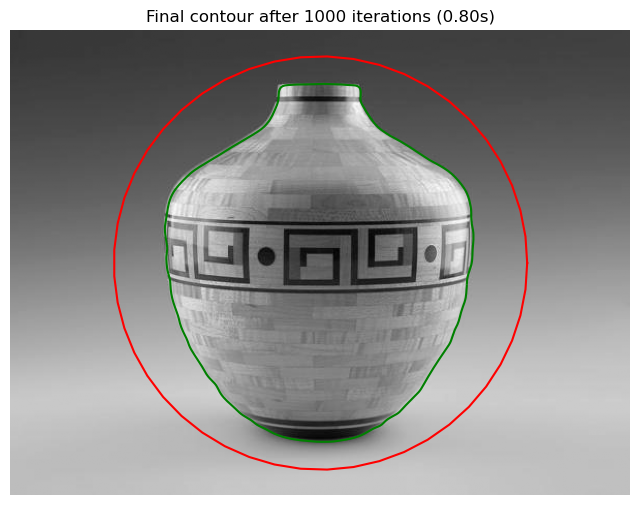

In [46]:
# Configure snake parameters
vase_params = SnakeParams(
    alpha=2000.0,  # Stronger continuity
    k=3.0,
    beta=2000.0,  # Stronger curvature
    gamma=0.003,  # Smaller time step
    sigma=1.0,  # Less blur
    kb=15.0,  # Weaker balloon force
    sb=50.0,  # More smoothing
    max_iter=1000,
    dmax=1.5,
    mfactor=1.0,
    cubic_spline_refinement=True,
    vfc_ksize=5,
    vfc_sigma=2.0,
)

# Create and evolve snake
vase_snake = Snake2D(vase, vase_v_init, vase_params)
v_final, iters, duration = vase_snake.evolve()

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(vase, cmap="gray")
plt.plot(vase_v_init[:, 0], vase_v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

In [6]:
smoothed_vase = vase_snake.get_I()
edge_map_vase = vase_snake.get_edge_map()
fx_vase, fy_vase = vase_snake.get_fext_components()

print(smoothed_vase.shape, edge_map_vase.shape, fx_vase.shape, fy_vase.shape)
print(smoothed_vase.dtype, edge_map_vase.dtype, fx_vase.dtype, fy_vase.dtype)

(450, 600) (450, 600) (450, 600) (450, 600)
uint8 uint8 uint8 uint8


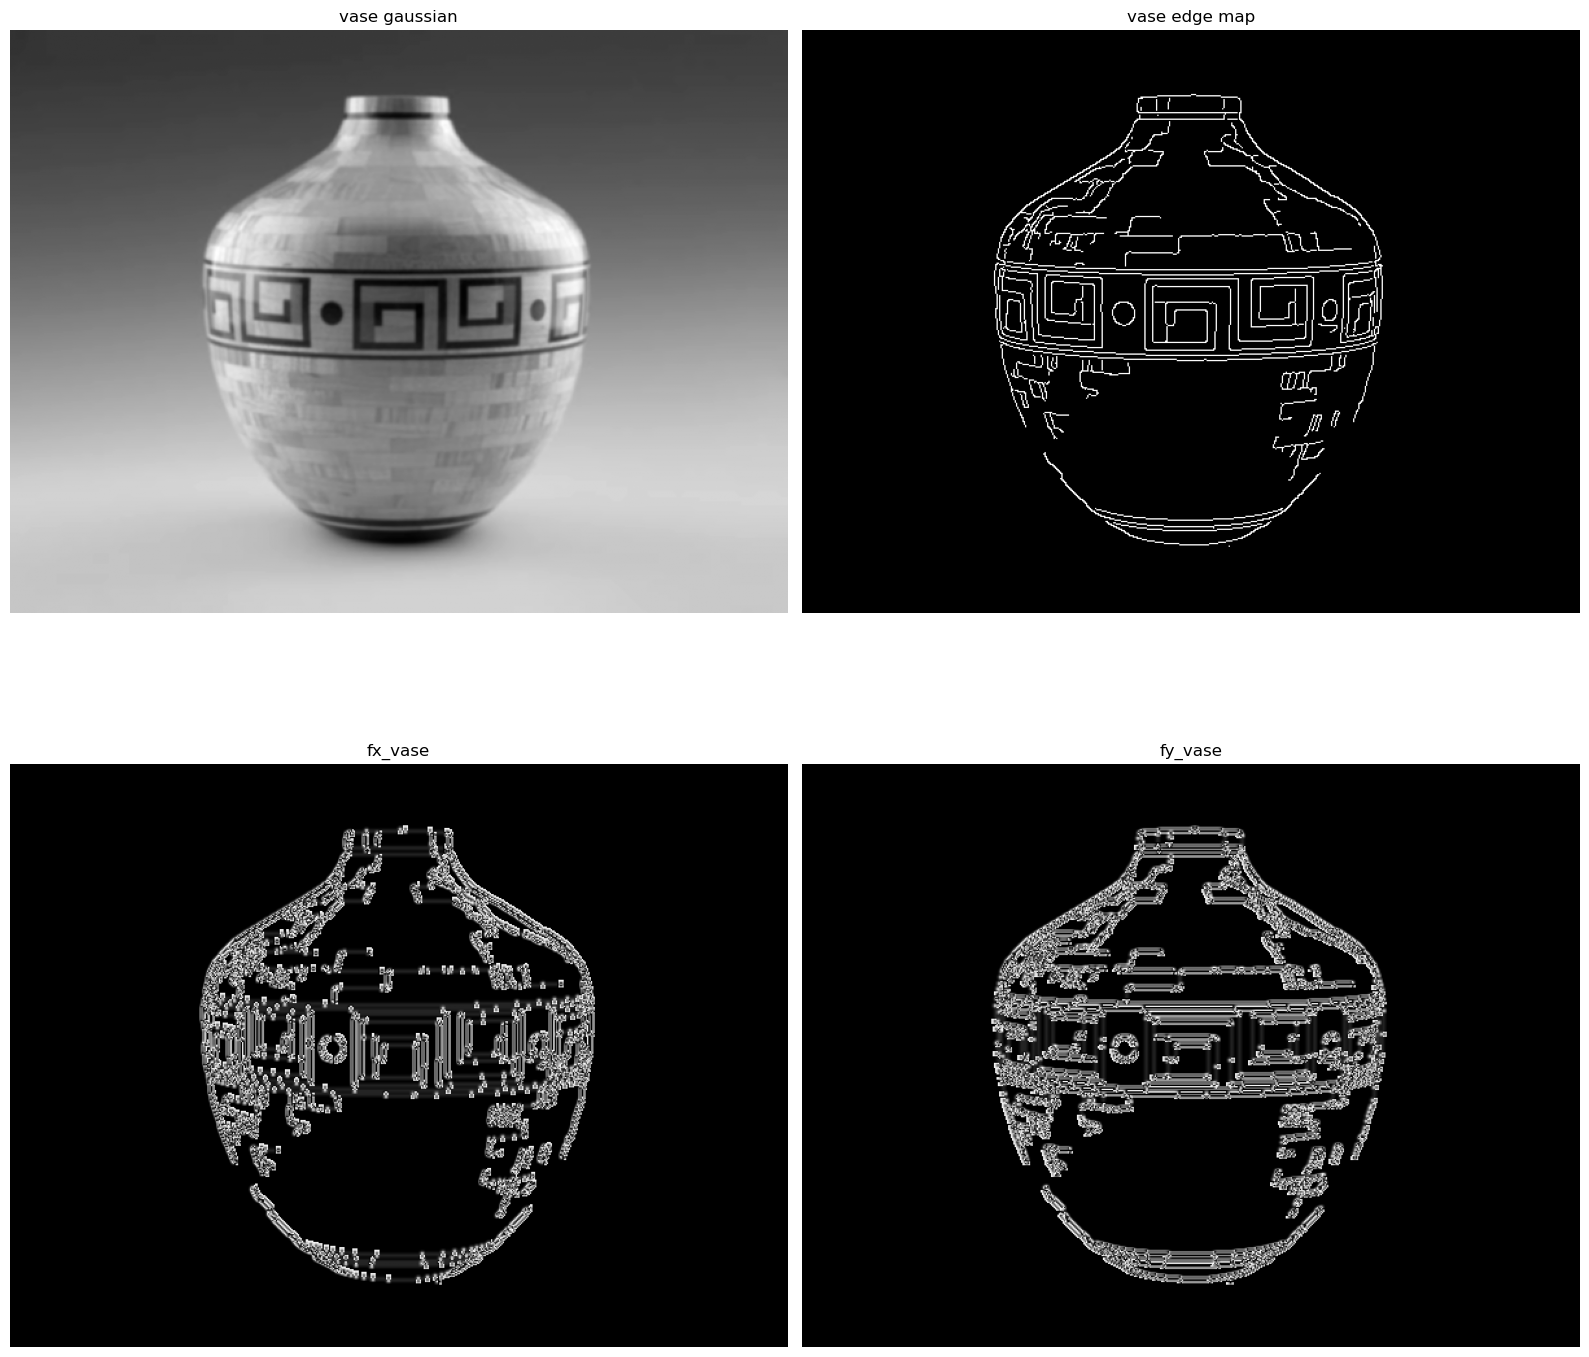

In [7]:
# Display initial contour
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))
ax1.imshow(smoothed_vase, cmap="gray")
ax1.set_title("vase gaussian")
ax1.axis("off")
ax2.imshow(edge_map_vase, cmap="gray")
ax2.set_title("vase edge map")
ax2.axis("off")
ax3.imshow(fx_vase, cmap="gray")
ax3.set_title("fx_vase")
ax3.axis("off")
ax4.imshow(fy_vase, cmap="gray")
ax4.set_title("fy_vase")
ax4.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# Load and display image
shield_image_path = "./imgs/shield.png"
shield = cv2.imread(shield_image_path, 0)  # Read as grayscale
print(shield.shape)
print(shield.dtype)

In [ ]:
shield_V_circle = init_circle(
    (shield.shape[1] // 2 - 3, shield.shape[0] // 2 - 50), 370, num_points=50
)
shield_V_subdivided = subdivision(shield_V_circle, k=3)
print("Pontos subdivididos:", shield_V_subdivided.shape)
shield_v_init = shield_V_subdivided

In [ ]:
# Display initial contour
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(shield, cmap="gray")
ax1.set_title("shield")
ax1.axis("off")
ax2.imshow(shield, cmap="gray")
ax2.set_title("shield init contour")
ax2.plot(shield_v_init[:, 0], shield_v_init[:, 1], "r-")
ax2.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# Configure snake parameters
shield_params = SnakeParams(
    alpha=3500.0,  # Stronger continuity
    beta=1000.0,  # Stronger curvature
    k=3.0,
    gamma=0.002,  # Smaller time step
    sigma=3.0,  # Less blur
    kb=0.0,  # Weaker balloon force
    sb=100.0,  # More smoothing
    max_iter=3000,
    verbose=True,
    cubic_spline_refinement=True,
    vfc_ksize=15,
    vfc_sigma=5.0,
)

# Create and evolve snake
shield_snake = Snake2D(shield, shield_v_init, shield_params)
v_final, iters, duration = shield_snake.evolve()

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(shield, cmap="gray")
plt.plot(shield_v_init[:, 0], shield_v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

In [ ]:
# Load and display image
poste1_image_path = "./tub-imgs/poste1.png"
poste1 = cv2.imread(poste1_image_path, 0)  # Read as grayscale
print(poste1.shape)

In [ ]:
poste1_initial_points2 = [
    [200, 75],
    [200, 755],
    [555, 755],
    [555, 75],
]

poste1_V_circle = init_circle(
    (poste1.shape[1] // 2, poste1.shape[0] // 2), 360, num_points=50
)
poste1_V_rect = init_rectangle(poste1_initial_points2, 50)

poste1_V_subdivided = subdivision(poste1_V_rect, k=2)
print("Pontos subdivididos:", poste1_V_subdivided.shape)
poste1_v_init = poste1_V_subdivided
# Display initial contour

In [ ]:
# Display initial contour
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(poste1, cmap="gray")
ax1.set_title("poste1")
ax1.axis("off")
ax2.imshow(poste1, cmap="gray")
ax2.set_title("poste1 init contour")
ax2.plot(poste1_v_init[:, 0], poste1_v_init[:, 1], "r-")
ax2.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# Configure snake parameters
poste1_params = SnakeParams(
    alpha=3600.0,  # Stronger continuity
    beta=1000.0,  # Stronger curvature
    k=2.0,
    gamma=0.0025,  # Smaller time step
    sigma=5.0,  # Less blur
    kb=10.0,  # Weaker balloon force
    sb=50.0,  # More smoothing
    max_iter=5000,
    verbose=True,
    cubic_spline_refinement=True,
    vfc_ksize=25,
    vfc_sigma=5.0,
)

# Create and evolve snake
poste1_snake = Snake2D(poste1, poste1_v_init, poste1_params)
v_final, iters, duration = poste1_snake.evolve()

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(poste1, cmap="gray")
plt.plot(poste1_v_init[:, 0], poste1_v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

In [3]:
# Load and display image
tubimg1_image_path = "./tub-imgs/tubimg1.jpg"
tubimg1 = cv2.imread(tubimg1_image_path, 0)  # Read as grayscale
print(tubimg1.shape)
print(tubimg1.dtype)

(800, 800)
uint8


In [42]:
# Parâmetros da elipse
center = (tubimg1.shape[1] // 2, tubimg1.shape[0] // 2)  # Centro em (x, y)
semi_major = 330  # Semi-eixo maior
semi_minor = 130  # Semi-eixo menor
angle = 1*np.pi/18  # Rotação de 45 graus
num_points = 100  # Número de pontos

# Gerar contorno elíptico
tubimg1_V_elipse = init_elipse(center, semi_major, semi_minor, angle, num_points)

tubimg1_V_circle = init_circle(
    (tubimg1.shape[1] // 2, tubimg1.shape[0] // 2), 360, num_points=50
)

subdivision_k = 3
tubimg1_V_subdivided = subdivision(tubimg1_V_elipse, k=subdivision_k)
print("Pontos subdivididos:", tubimg1_V_subdivided.shape)
tubimg1_v_init = tubimg1_V_subdivided

Pontos subdivididos: (510, 2)


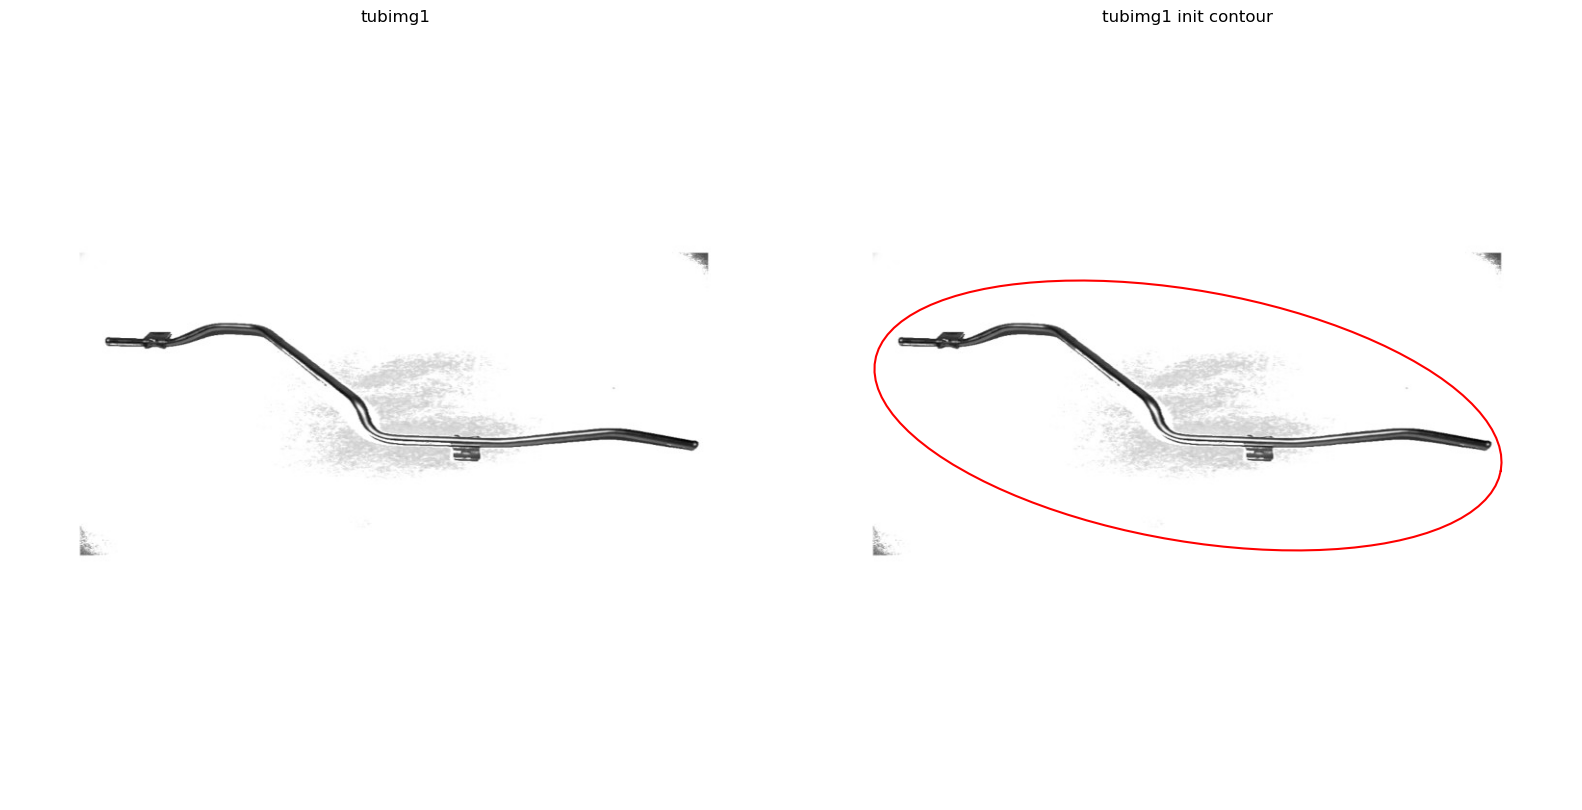

In [43]:
# Display initial contour
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(tubimg1, cmap="gray")
ax1.set_title("tubimg1")
ax1.axis("off")
ax2.imshow(tubimg1, cmap="gray")
ax2.set_title("tubimg1 init contour")
ax2.plot(tubimg1_v_init[:, 0], tubimg1_v_init[:, 1], "r-")
ax2.axis("off")
plt.tight_layout()
plt.show()

0.03752323544255502


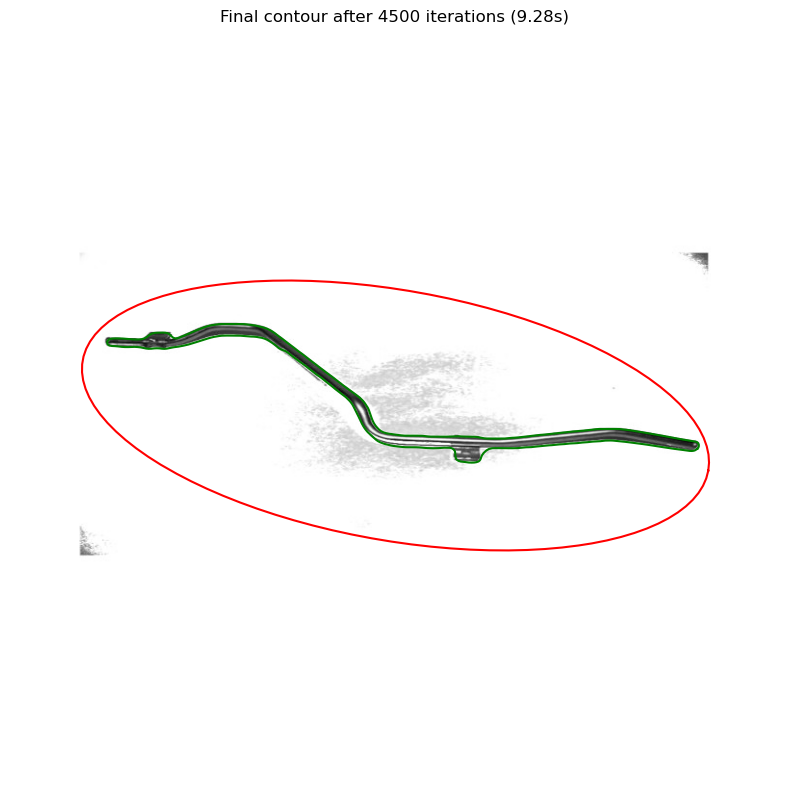

In [72]:
# Configure snake parameters
tubimg1_params = SnakeParams(
    alpha=1200.0,  # Stronger continuity
    beta=400.0,  # Stronger curvature
    k=float(subdivision_k),
    gamma=0.002,  # Smaller time step
    sigma=2.0,  # Less blur
    kb=20.0,  # Weaker balloon force
    sb=50.0,  # More smoothing
    max_iter=4500,
    verbose=True,
    cubic_spline_refinement=True,
    dmax=1.5,
    mfactor=1.0,
    vfc_ksize=5,
    vfc_sigma=2.0,
)

# Create and evolve snake
tubimg1_snake = Snake2D(tubimg1, tubimg1_v_init, tubimg1_params)
v_final, iters, duration = tubimg1_snake.evolve()

# Display result
plt.figure(figsize=(10, 10))
plt.imshow(tubimg1, cmap="gray")
plt.plot(tubimg1_v_init[:, 0], tubimg1_v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

In [73]:
smoothed_tubimg1 = tubimg1_snake.get_I()
edge_map_tubimg1 = tubimg1_snake.get_edge_map()
fx_tubimg1, fy_tubimg1 = tubimg1_snake.get_fext_components()

print(smoothed_tubimg1.shape, edge_map_tubimg1.shape, fx_tubimg1.shape, fy_tubimg1.shape)
print(smoothed_tubimg1.dtype, edge_map_tubimg1.dtype, fx_tubimg1.dtype, fy_tubimg1.dtype)

(800, 800) (800, 800) (800, 800) (800, 800)
uint8 uint8 uint8 uint8


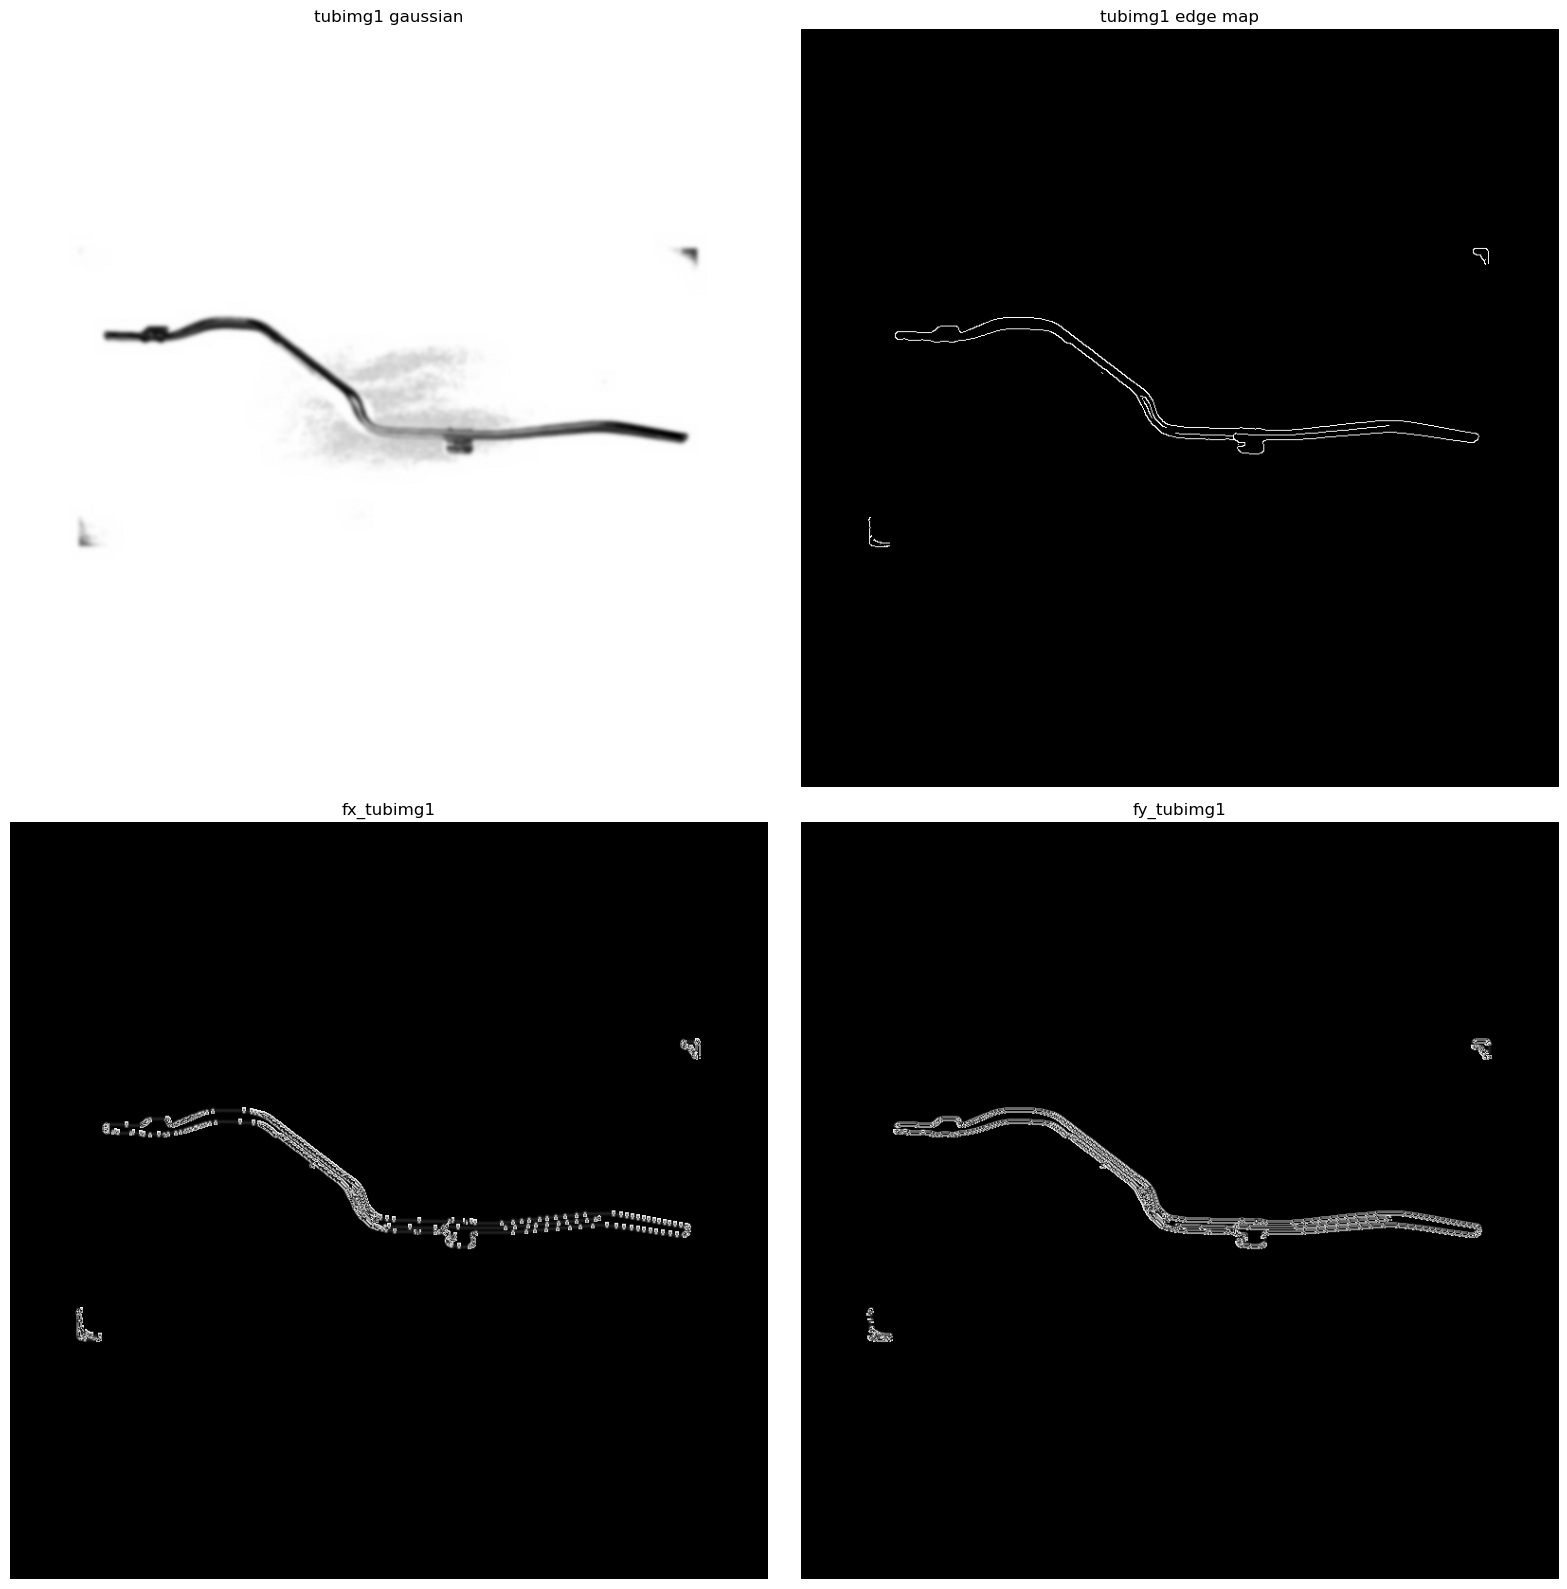

In [74]:
# Display initial contour
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))
ax1.imshow(smoothed_tubimg1, cmap="gray")
ax1.set_title("tubimg1 gaussian")
ax1.axis("off")
ax2.imshow(edge_map_tubimg1, cmap="gray")
ax2.set_title("tubimg1 edge map")
ax2.axis("off")
ax3.imshow(fx_tubimg1, cmap="gray")
ax3.set_title("fx_tubimg1")
ax3.axis("off")
ax4.imshow(fy_tubimg1, cmap="gray")
ax4.set_title("fy_tubimg1")
ax4.axis("off")
plt.tight_layout()
plt.show()

In [8]:
# Load and display image
metal1_image_path = "./tub-imgs/metal1-cleaned.jpg"
metal1 = cv2.imread(metal1_image_path, 0)  # Read as grayscale
print(metal1.shape)
print(metal1.dtype)

(600, 800)
uint8


In [9]:
# Parâmetros da elipse
center = (metal1.shape[1] // 2, metal1.shape[0] // 2)  # Centro em (x, y)
semi_major = 375  # Semi-eixo maior
semi_minor = 120  # Semi-eixo menor
angle = 0  # Rotação de 45 graus
num_points = 100  # Número de pontos

# Gerar contorno elíptico
metal1_V_elipse = init_elipse(center, semi_major, semi_minor, angle, num_points)

metal1_V_circle = init_circle(
    (metal1.shape[1] // 2 - 3, metal1.shape[0] // 2 - 50), 370, num_points=50
)
subdivision_k = 3
metal1_V_subdivided = subdivision(metal1_V_elipse, k=subdivision_k)
print("Pontos subdivididos:", metal1_V_subdivided.shape)
metal1_v_init = metal1_V_subdivided

Pontos subdivididos: (558, 2)


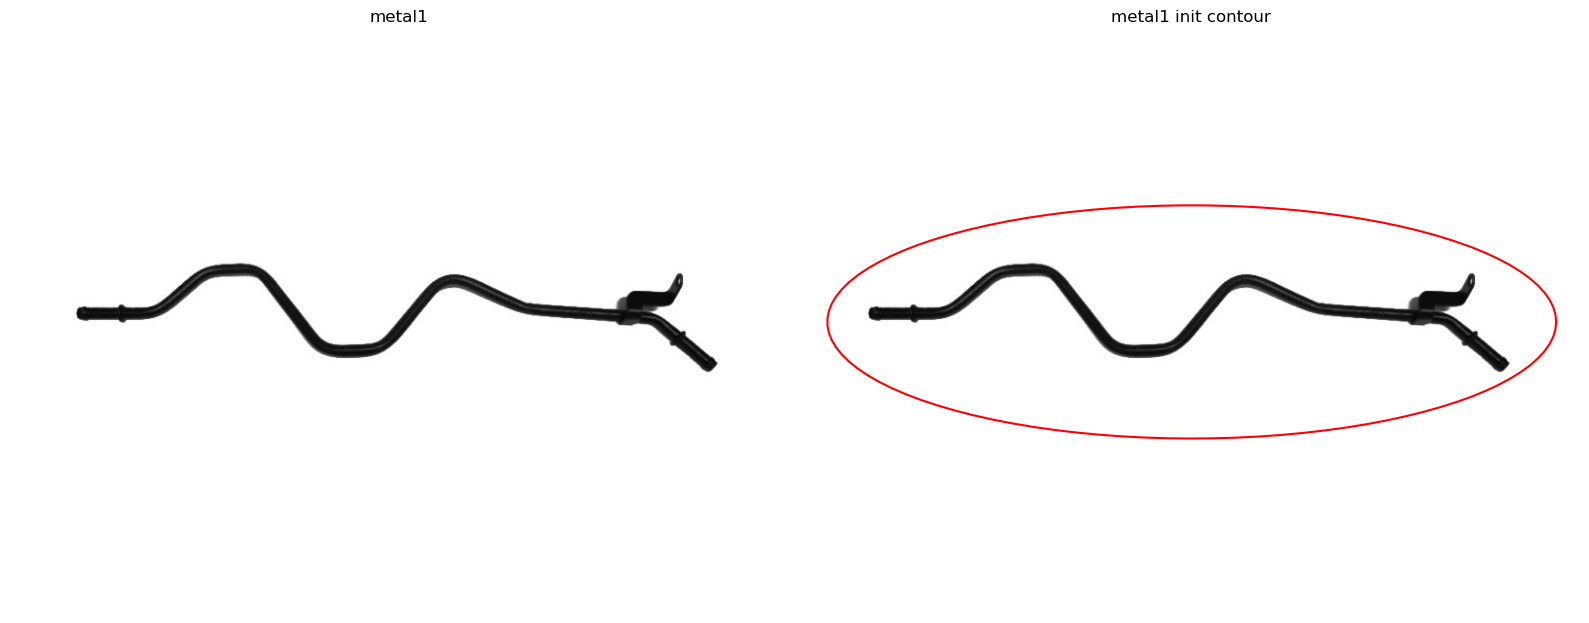

In [10]:
# Display initial contour
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(metal1, cmap="gray")
ax1.set_title("metal1")
ax1.axis("off")
ax2.imshow(metal1, cmap="gray")
ax2.set_title("metal1 init contour")
ax2.plot(metal1_v_init[:, 0], metal1_v_init[:, 1], "r-")
ax2.axis("off")
plt.tight_layout()
plt.show()

0.04550578388023703


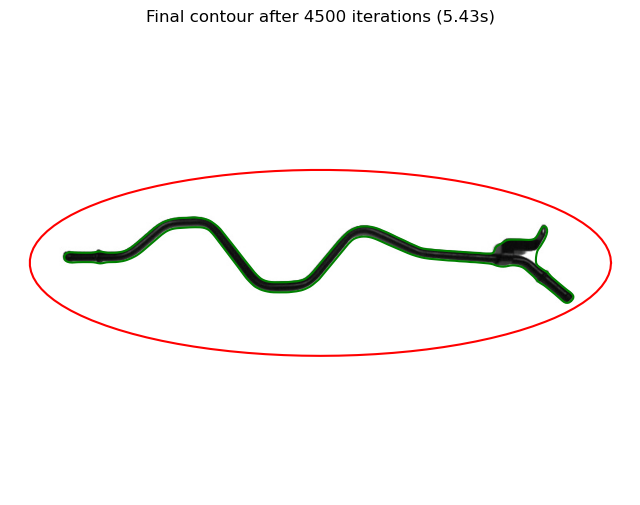

In [11]:
# Configure snake parameters
metal1_params = SnakeParams(
    alpha=1200.0,  # Stronger continuity
    beta=400.0,  # Stronger curvature
    k=float(subdivision_k),
    gamma=0.002,  # Smaller time step
    sigma=2.0,  # Less blur
    kb=20.0,  # Weaker balloon force
    sb=50.0,  # More smoothing
    max_iter=4500,
    verbose=True,
    cubic_spline_refinement=True,
    dmax=1.5,
    mfactor=1.0,
    vfc_ksize=5,
    vfc_sigma=2.0,
)

# Create and evolve snake
metal1_snake = Snake2D(metal1, metal1_v_init, metal1_params)
v_final, iters, duration = metal1_snake.evolve()

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(metal1, cmap="gray")
plt.plot(metal1_v_init[:, 0], metal1_v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

In [13]:
smoothed_metal1 = metal1_snake.get_I()
edge_map_metal1 = metal1_snake.get_edge_map()
fx_metal1, fy_metal1 = metal1_snake.get_fext_components()

print(smoothed_metal1.shape, edge_map_metal1.shape, fx_metal1.shape, fy_metal1.shape)
print(smoothed_metal1.dtype, edge_map_metal1.dtype, fx_metal1.dtype, fy_metal1.dtype)

(600, 800) (600, 800) (600, 800) (600, 800)
uint8 uint8 uint8 uint8


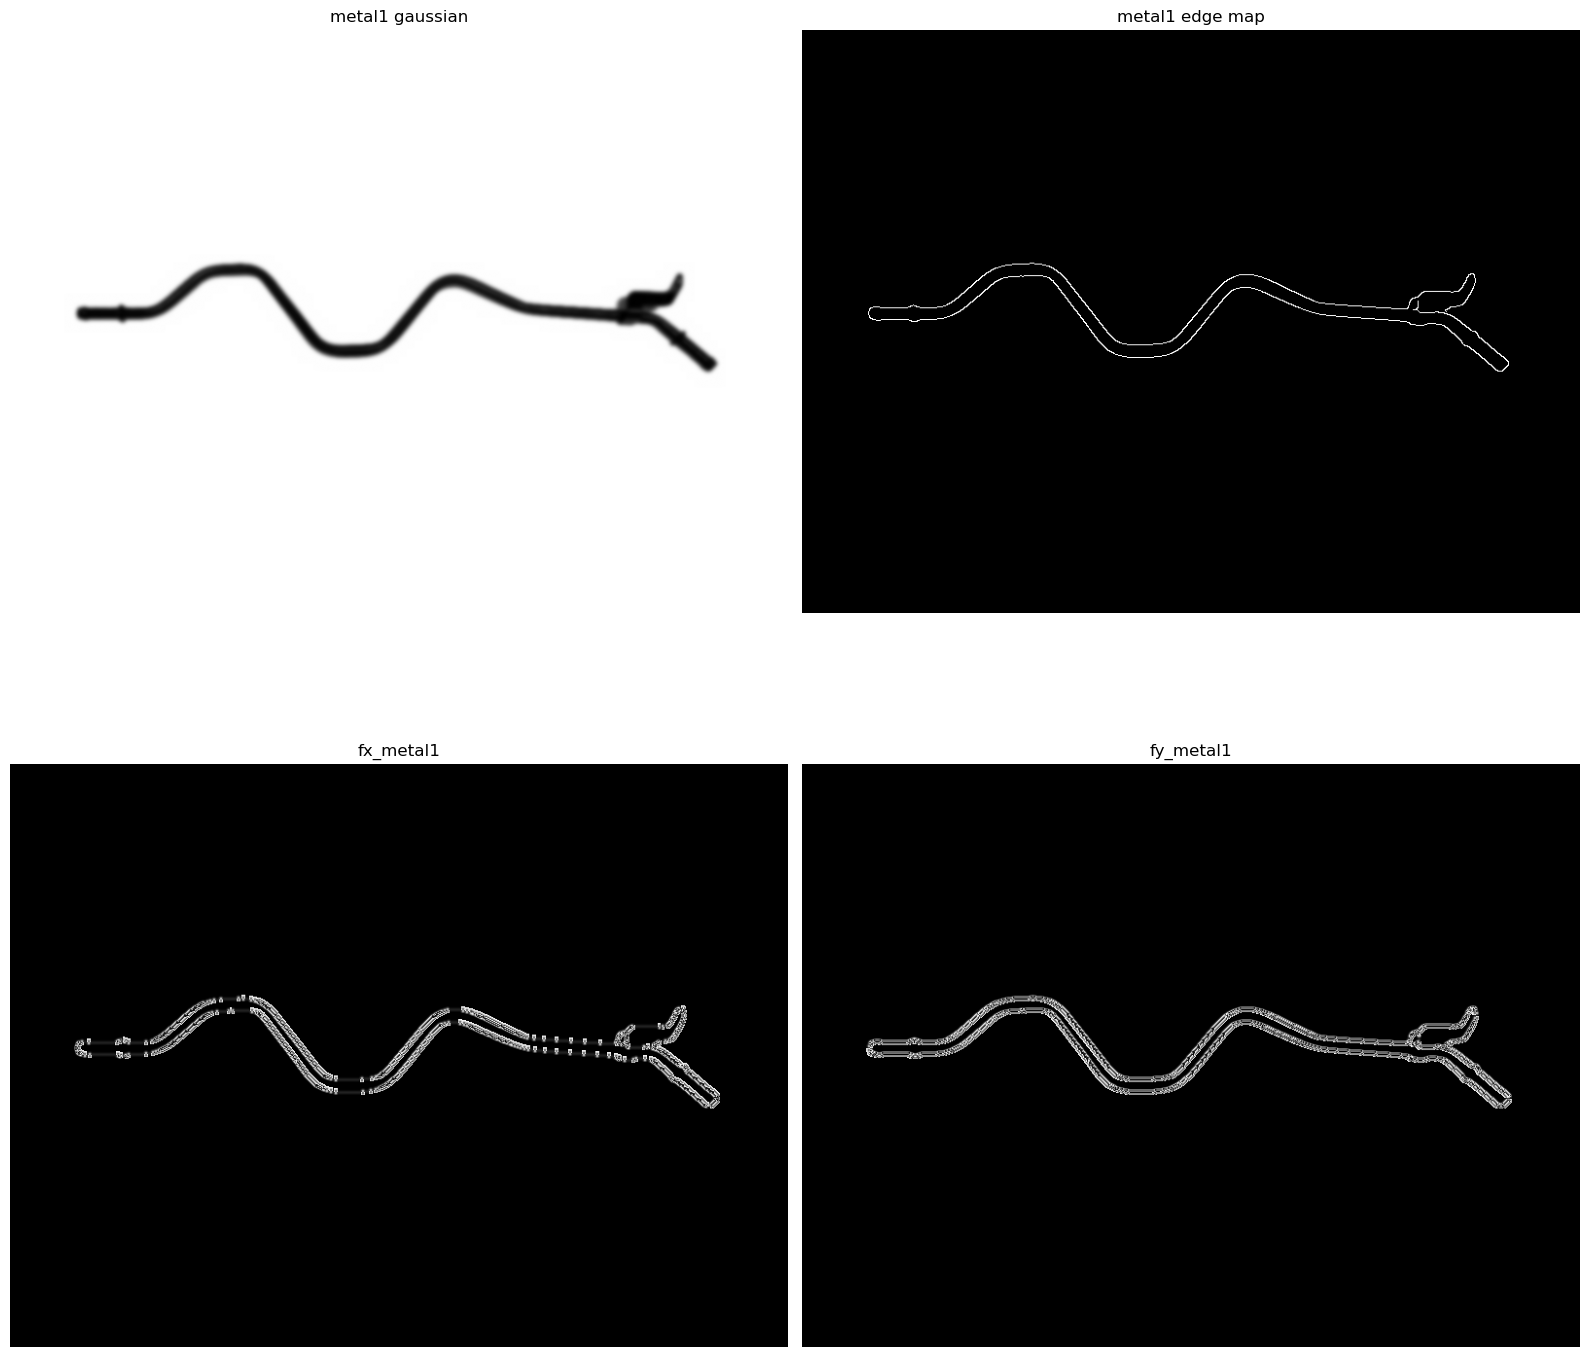

In [14]:
# Display initial contour
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))
ax1.imshow(smoothed_metal1, cmap="gray")
ax1.set_title("metal1 gaussian")
ax1.axis("off")
ax2.imshow(edge_map_metal1, cmap="gray")
ax2.set_title("metal1 edge map")
ax2.axis("off")
ax3.imshow(fx_metal1, cmap="gray")
ax3.set_title("fx_metal1")
ax3.axis("off")
ax4.imshow(fy_metal1, cmap="gray")
ax4.set_title("fy_metal1")
ax4.axis("off")
plt.tight_layout()
plt.show()

In [15]:
# Load and display image
neuron1_image_path = "./neurons/neuron1.jpg"
neuron1 = cv2.imread(neuron1_image_path, 0)  # Read as grayscale
neuron1 = resize_with_aspect_ratio(neuron1, height=400)
print(neuron1.shape)
print(neuron1.dtype)

(400, 711)
uint8


In [16]:
# Parâmetros da elipse
center = (neuron1.shape[1] // 2, neuron1.shape[0] // 2)  # Centro em (x, y)
semi_major = 130  # Semi-eixo maior
semi_minor = 330  # Semi-eixo menor
angle = 7 * np.pi / 18  # Rotação de 45 graus
num_points = 100  # Número de pontos

# Gerar contorno elíptico
neuron1_V_elipse = init_elipse(center, semi_major, semi_minor, angle, num_points)

neuron1_V_circle = init_circle(
    (neuron1.shape[1] // 2 - 3, neuron1.shape[0] // 2 - 50), 370, num_points=50
)
subdivision_k = 3
neuron1_V_subdivided = subdivision(neuron1_V_elipse, k=subdivision_k)
print("Pontos subdivididos:", neuron1_V_subdivided.shape)
neuron1_v_init = neuron1_V_subdivided

Pontos subdivididos: (508, 2)


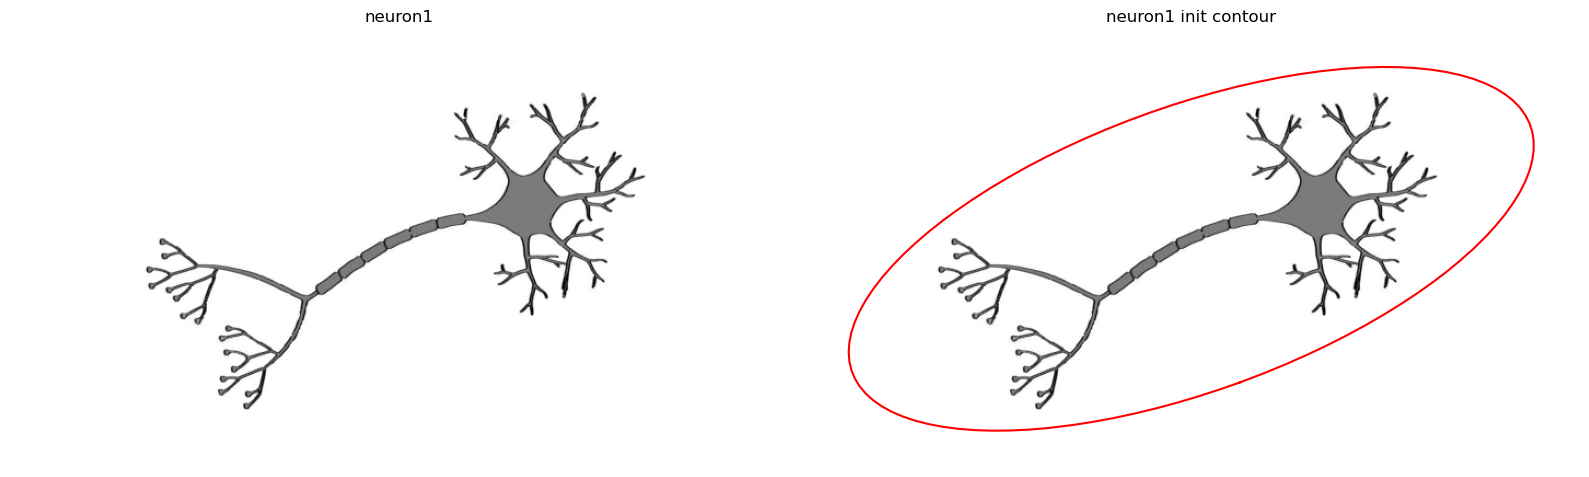

In [17]:
# Display initial contour
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(neuron1, cmap="gray")
ax1.set_title("neuron1")
ax1.axis("off")
ax2.imshow(neuron1, cmap="gray")
ax2.set_title("neuron1 init contour")
ax2.plot(neuron1_v_init[:, 0], neuron1_v_init[:, 1], "r-")
ax2.axis("off")
plt.tight_layout()
plt.show()

0.008188488452196678


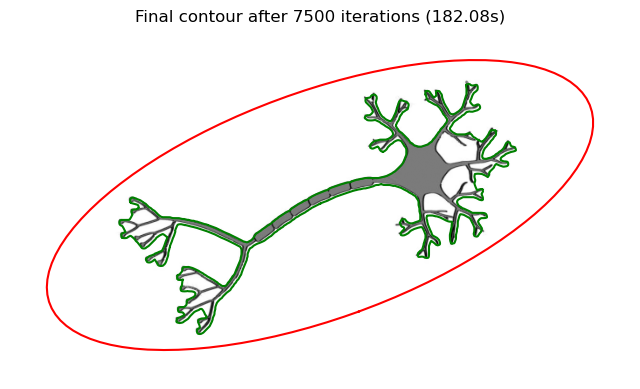

In [18]:
# Configure snake parameters
neuron1_params = SnakeParams(
    alpha=500.0,  # Stronger continuity
    beta=50.0,  # Stronger curvature
    k=float(subdivision_k),
    gamma=0.002,  # Smaller time step
    sigma=3.0,  # Less blur
    kb=30.0,  # Weaker balloon force
    sb=15.0,  # More smoothing
    max_iter=7500,
    cubic_spline_refinement=True,
    dmax=2.0,
    mfactor=1.05,
    vfc_ksize=5,
    vfc_sigma=1.0,
)

# Create and evolve snake
neuron1_snake = Snake2D(neuron1, neuron1_v_init, neuron1_params)
v_final, iters, duration = neuron1_snake.evolve()

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(neuron1, cmap="gray")
plt.plot(neuron1_v_init[:, 0], neuron1_v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

In [19]:
smoothed_neuron1 = neuron1_snake.get_I()
edge_map_neuron1 = neuron1_snake.get_edge_map()
fx_neuron1, fy_neuron1 = neuron1_snake.get_fext_components()

print(smoothed_neuron1.shape, edge_map_neuron1.shape, fx_neuron1.shape, fy_neuron1.shape)
print(smoothed_neuron1.dtype, edge_map_neuron1.dtype, fx_neuron1.dtype, fy_neuron1.dtype)

(400, 711) (400, 711) (400, 711) (400, 711)
uint8 uint8 uint8 uint8


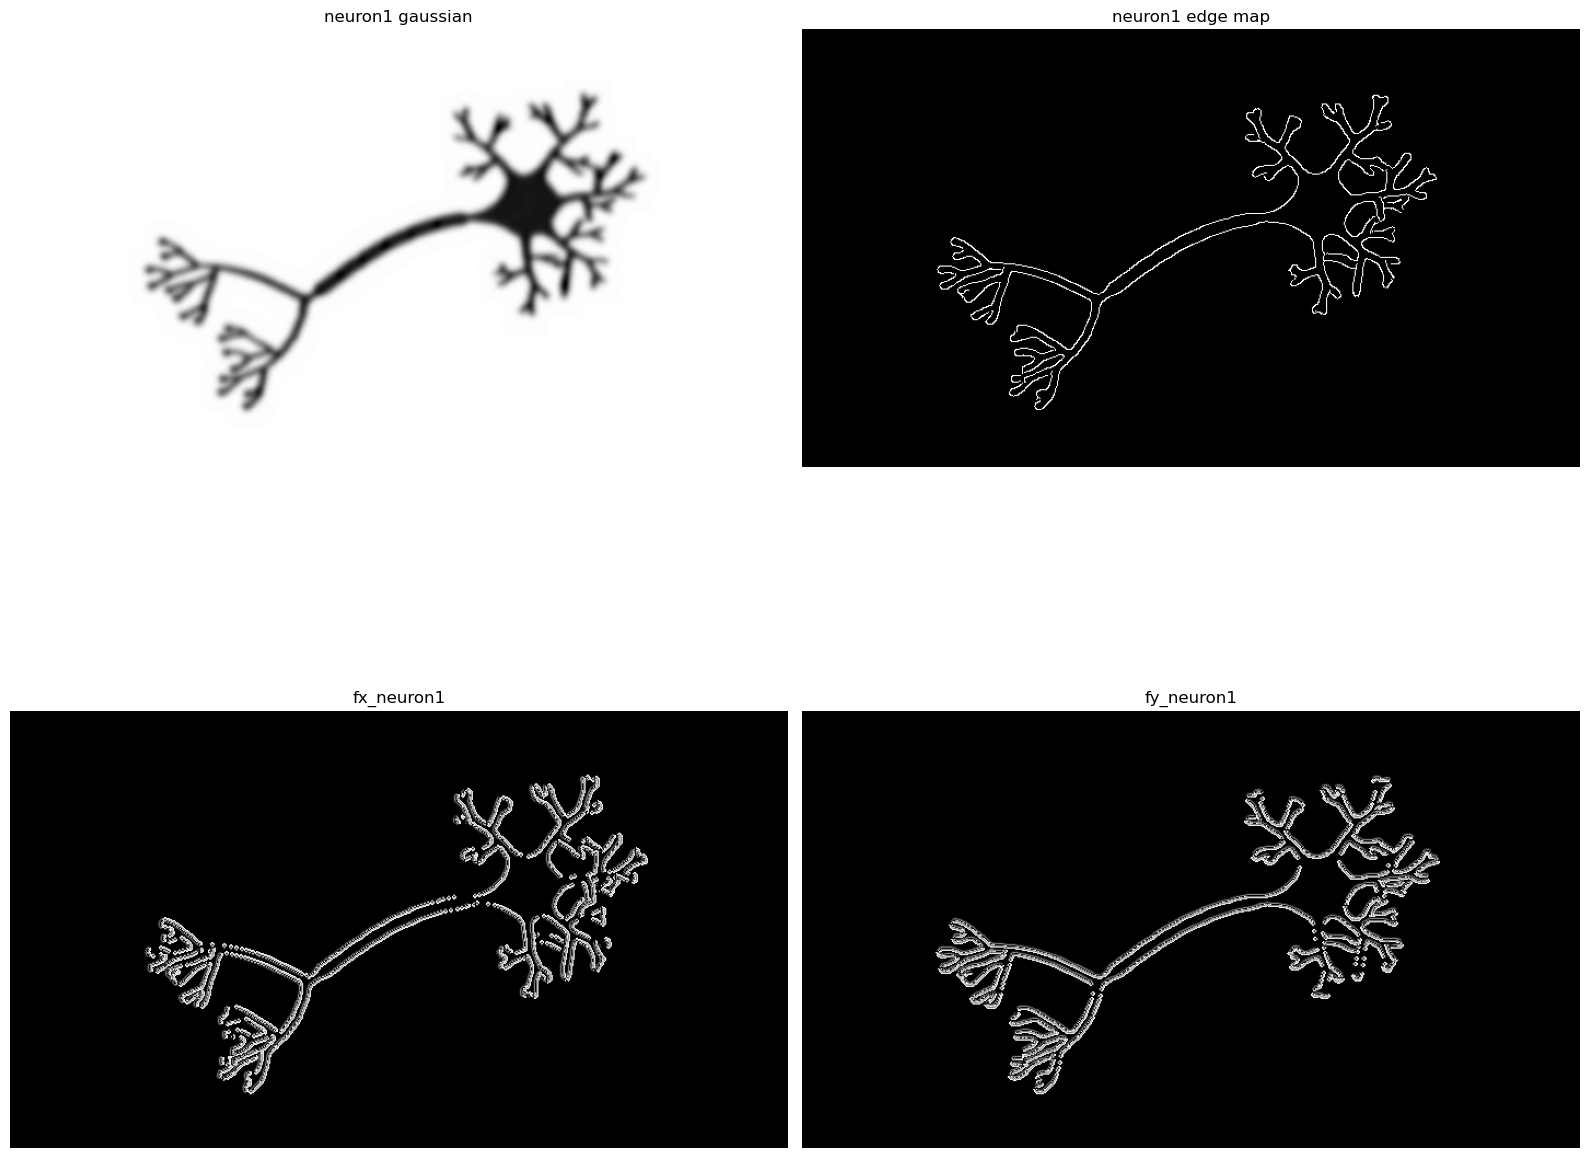

In [20]:
# Display initial contour
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))
ax1.imshow(smoothed_neuron1, cmap="gray")
ax1.set_title("neuron1 gaussian")
ax1.axis("off")
ax2.imshow(edge_map_neuron1, cmap="gray")
ax2.set_title("neuron1 edge map")
ax2.axis("off")
ax3.imshow(fx_neuron1, cmap="gray")
ax3.set_title("fx_neuron1")
ax3.axis("off")
ax4.imshow(fy_neuron1, cmap="gray")
ax4.set_title("fy_neuron1")
ax4.axis("off")
plt.tight_layout()
plt.show()

In [21]:
# Load and display image
neuron3_image_path = "./neurons/neuron3.jpg"
neuron3 = cv2.imread(neuron3_image_path, 0)  # Read as grayscale
neuron3 = resize_with_aspect_ratio(neuron3, height=400)
print(neuron3.shape)
print(neuron3.dtype)

(400, 711)
uint8


In [22]:
# Parâmetros da elipse
center = (neuron3.shape[1] // 2, neuron3.shape[0] // 2 -7)  # Centro em (x, y)
semi_major = 350  # Semi-eixo maior
semi_minor = 170  # Semi-eixo menor
angle = 0  # Rotação de 45 graus
num_points = 100  # Número de pontos

# Gerar contorno elíptico
neuron3_V_elipse = init_elipse(center, semi_major, semi_minor, angle, num_points)

neuron3_V_circle = init_circle(
    (neuron3.shape[1] // 2 - 3, neuron3.shape[0] // 2 - 50), 370, num_points=50
)
subdivision_k = 3
neuron3_V_subdivided = subdivision(neuron3_V_elipse, k=subdivision_k)
print("Pontos subdivididos:", neuron3_V_subdivided.shape)
neuron3_v_init = neuron3_V_subdivided

Pontos subdivididos: (559, 2)


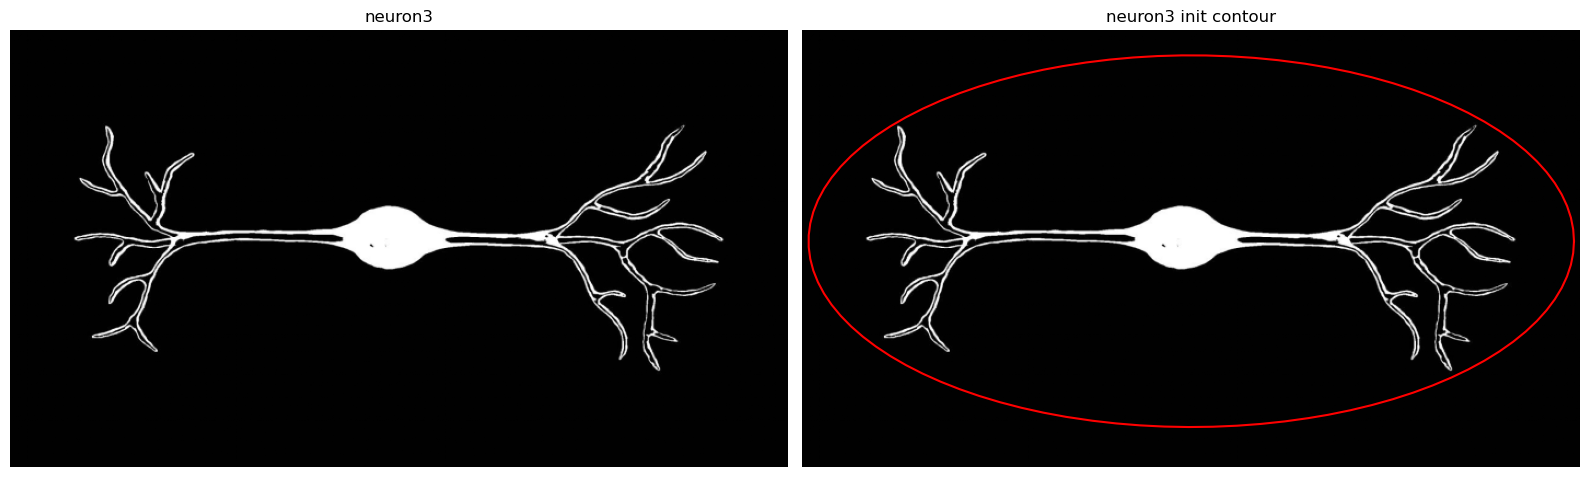

In [23]:
# Display initial contour
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(neuron3, cmap="gray")
ax1.set_title("neuron3")
ax1.axis("off")
ax2.imshow(neuron3, cmap="gray")
ax2.set_title("neuron3 init contour")
ax2.plot(neuron3_v_init[:, 0], neuron3_v_init[:, 1], "r-")
ax2.axis("off")
plt.tight_layout()
plt.show()

0.5287709385253013


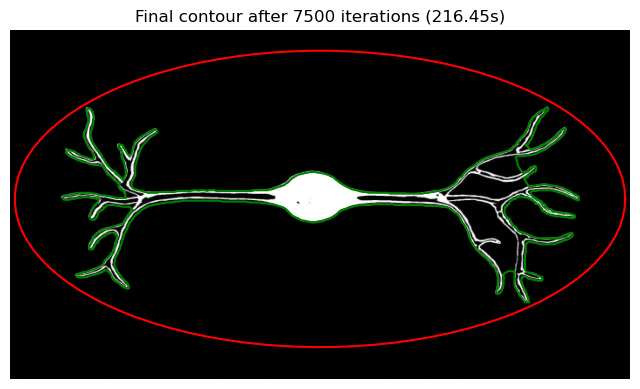

In [24]:
# Configure snake parameters
neuron3_params = SnakeParams(
    alpha=700.0,  # Stronger continuity
    beta=50.0,  # Stronger curvature
    k=float(subdivision_k),
    gamma=0.003,  # Smaller time step
    sigma=2.0,  # Less blur
    kb=25.0,  # Weaker balloon force
    sb=70.0,  # More smoothing
    max_iter=7500,
    cubic_spline_refinement=True,
    dmax=2.0,
    mfactor=1.05,
    vfc_ksize=5,
    vfc_sigma=1.0,
)

# Create and evolve snake
neuron3_snake = Snake2D(neuron3, neuron3_v_init, neuron3_params)
v_final, iters, duration = neuron3_snake.evolve()

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(neuron3, cmap="gray")
plt.plot(neuron3_v_init[:, 0], neuron3_v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

In [25]:
smoothed_neuron3 = neuron3_snake.get_I()
edge_map_neuron3 = neuron3_snake.get_edge_map()
fx_neuron3, fy_neuron3 = neuron3_snake.get_fext_components()

print(smoothed_neuron3.shape, edge_map_neuron3.shape, fx_neuron3.shape, fy_neuron3.shape)
print(smoothed_neuron3.dtype, edge_map_neuron3.dtype, fx_neuron3.dtype, fy_neuron3.dtype)

(400, 711) (400, 711) (400, 711) (400, 711)
uint8 uint8 uint8 uint8


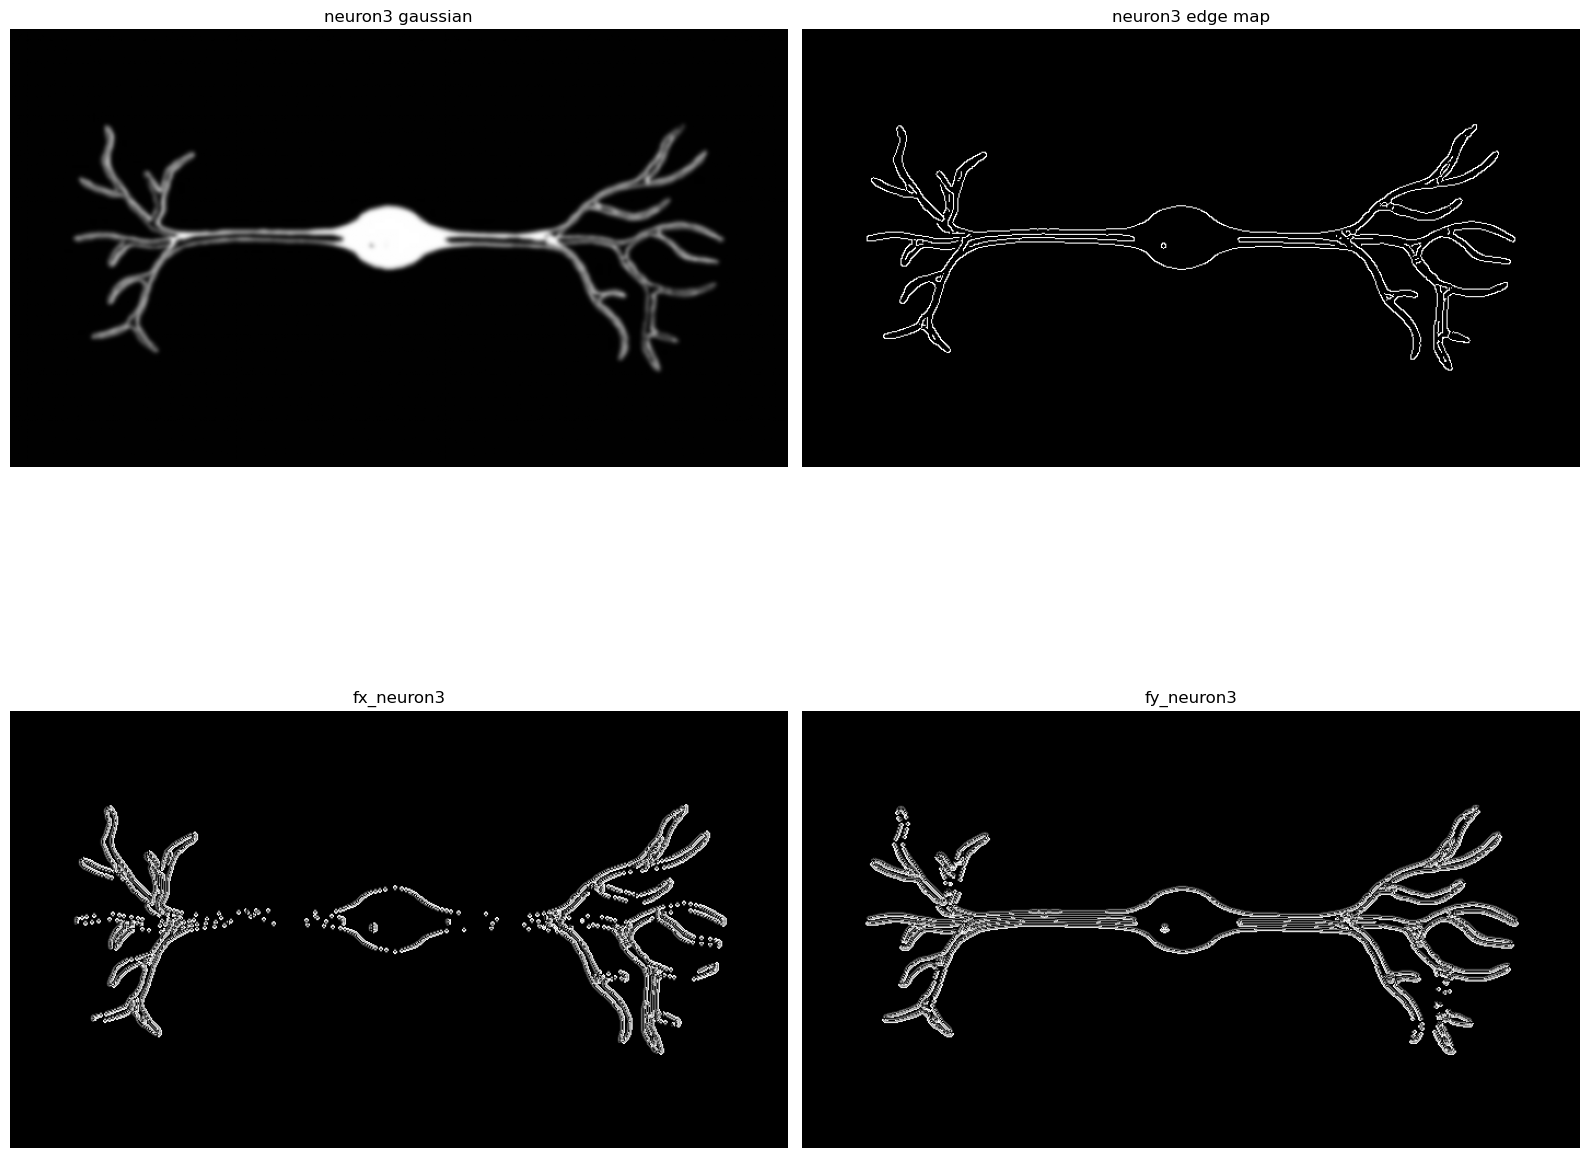

In [26]:
# Display initial contour
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))
ax1.imshow(smoothed_neuron3, cmap="gray")
ax1.set_title("neuron3 gaussian")
ax1.axis("off")
ax2.imshow(edge_map_neuron3, cmap="gray")
ax2.set_title("neuron3 edge map")
ax2.axis("off")
ax3.imshow(fx_neuron3, cmap="gray")
ax3.set_title("fx_neuron3")
ax3.axis("off")
ax4.imshow(fy_neuron3, cmap="gray")
ax4.set_title("fy_neuron3")
ax4.axis("off")
plt.tight_layout()
plt.show()